In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import time

In [2]:
tic = time.time()

In [3]:
flights = pd.read_csv('data/flights_clean.csv').sample(10000)
flights

,airline,day,day_of_week,departure_delay,destination_airport,destination_latitude,destination_longitude,distance,month,origin_airport,...,scheduled_arrival,scheduled_departure,scheduled_time,state_destination,state_origin,taxi_in,taxi_out,day_of_year,origin_temperature,destination_temperature
3093131,UA,23,3,-4.0,IAD,38.94453,-77.45581,1956,9,PHX,...,890,450,260.0,VA,AZ,5.0,10.0,266,80.7,69.8
3749631,EV,3,2,-6.0,DAY,39.90238,-84.21938,533,3,EWR,...,585,465,120.0,OH,NJ,6.0,12.0,62,27.0,26.4
780302,DL,26,7,59.0,SLC,40.78839,-111.97777,1195,7,IAH,...,1265,1135,190.0,UT,TX,5.0,17.0,207,87.0,82.5
211185,UA,31,2,-9.0,ORD,41.97960,-87.90446,802,3,DFW,...,567,425,142.0,IL,TX,17.0,17.0,90,71.5,48.7
3662322,OO,7,7,0.0,LIT,34.72940,-92.22425,771,6,DEN,...,783,595,128.0,AR,CO,6.0,20.0,158,64.6,82.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1923222,UA,21,6,3.0,MCO,28.42889,-81.31603,758,3,IAD,...,654,510,144.0,FL,VA,9.0,20.0,80,44.0,75.9
1759274,NK,27,5,-8.0,TPA,27.97547,-82.53325,1012,2,ORD,...,736,515,161.0,FL,IL,3.0,24.0,58,6.0,57.9
3873367,WN,13,4,92.0,ROC,43.11887,-77.67238,523,8,MDW,...,30,1320,90.0,NY,IL,5.0,10.0,225,73.8,65.2
1745245,EV,26,4,-11.0,IAH,29.98047,-95.33972,201,2,CRP,...,397,335,62.0,TX,TX,11.0,13.0,57,51.7,40.5


In [4]:
pre_y = flights.departure_delay

In [5]:
pre_X = flights.drop(columns=['departure_delay', 'airline', 'destination_airport',
                              'origin_airport', 'state_destination', 'state_origin'])

In [6]:
X, X_test, y, y_test = train_test_split(pre_X, pre_y)

In [7]:
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [8]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

In [9]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

Text(0, 0.5, 'Standardized coefficient')

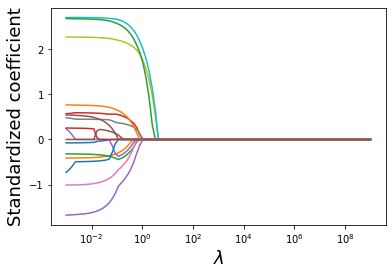

In [10]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
#plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')

In [11]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

0.19137472392581564

Text(0, 0.5, 'Cross-validation error')

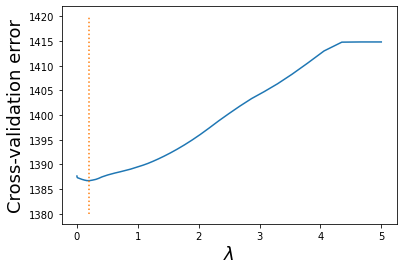

In [19]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[1380,1420],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

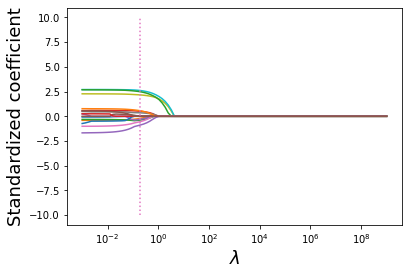

In [13]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.plot([lassocv.alpha_,lassocv.alpha_],[-10,10],':')

In [14]:
Xtest_std = scaler.transform(X_test)

In [15]:
#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

In [16]:
#RMSE on test data
np.sqrt(((pred-y_test)**2).mean())

45.12435787720725

In [17]:
y_test.std()

45.49223326981368

In [18]:
toc = time.time()
toc - tic

35.93799090385437

In [20]:
tic_dummy = time.time()

In [21]:
flights = pd.read_csv('data/flights_clean_numerical.csv').sample(10000)
flights

,day,day_of_week,departure_delay,destination_latitude,destination_longitude,distance,month,origin_latitude,origin_longitude,scheduled_arrival,...,state_origin_SD,state_origin_TN,state_origin_TX,state_origin_UT,state_origin_VA,state_origin_VT,state_origin_WA,state_origin_WI,state_origin_WV,state_origin_WY
2968034,4,5,73.0,40.69250,-74.16866,628,9,32.89865,-80.04051,1104,...,0,0,0,0,0,0,0,0,0,0
1219734,2,3,-6.0,41.97960,-87.90446,137,12,42.88082,-85.52277,564,...,0,0,0,0,0,0,0,0,0,0
2024133,3,5,-5.0,35.87764,-78.78747,431,4,40.77724,-73.87261,1213,...,0,0,0,0,0,0,0,0,0,0
2534297,17,3,-8.0,39.17540,-76.66820,787,6,35.04242,-89.97667,1300,...,0,1,0,0,0,0,0,0,0,0
3885897,27,5,-4.0,41.70895,-86.31847,411,11,44.88055,-93.21692,1312,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137895,29,2,2.0,39.99799,-82.89188,447,9,33.64044,-84.42694,1068,...,0,0,0,0,0,0,0,0,0,0
3793420,6,1,-1.0,36.09775,-79.93730,445,7,40.69250,-74.16866,1153,...,0,0,0,0,0,0,0,0,0,0
1346453,5,1,-11.0,40.78839,-111.97777,626,1,32.73356,-117.18966,1367,...,0,0,0,0,0,0,0,0,0,0
1176756,18,3,-3.0,33.94254,-118.40807,109,11,32.73356,-117.18966,1220,...,0,0,0,0,0,0,0,0,0,0


In [22]:
pre_y = flights.departure_delay

In [23]:
pre_X = flights.drop(columns=['departure_delay'])

In [24]:
X, X_test, y, y_test = train_test_split(pre_X, pre_y)

In [25]:
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

In [26]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,-2,100)*0.1

In [27]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.437e+03, tolerance: 1.238e+03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.417e+05, tolerance: 1.238e+03
  model = cd_fast.enet_coordinate_descent(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Text(0, 0.5, 'Standardized coefficient')

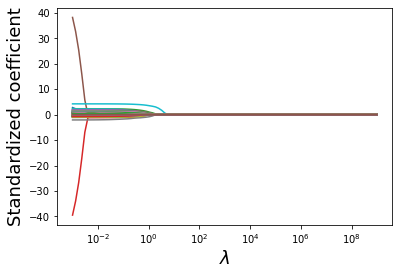

In [28]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
#plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')

In [30]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
alphas = 10**np.linspace(1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

KeyboardInterrupt: 

In [ ]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[1365,1400],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

In [ ]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
alphas = 10**np.linspace(10,-2,100)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
plt.plot([lassocv.alpha_,lassocv.alpha_],[-10,10],':')

In [ ]:
Xtest_std = scaler.transform(X_test)

In [ ]:
#Using the developed lasso model to predict on test data
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(Xstd, y)
pred=lasso.predict(Xtest_std)

In [ ]:
#RMSE on test data
np.sqrt(((pred-y_test)**2).mean())

In [ ]:
y_test.std()

In [ ]:
toc_dummy = time.time()
toc_dummy - tic_dummy